In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from polling_simulator import Demographic, Variable, generate_electorate, run_elections, run_polls
from polling_simulator.aggregation import naive_aggregation
from polling_simulator.sampling import predefined_sample

sns_palette = sns.color_palette()[::3] # makes first color blue, second color red
sns.set_palette(sns_palette)

Let's set up a dummy electorate, with a single demographic that includes everyone, and has the same vote preference and population as Georgia in the 2020 presedential election:

In [2]:

everyone = Variable("everyone", lambda x: np.ones(x).astype(bool))

georgia_registered_voters = 7233584
georgia_actual_voters = 2474507 + 2461837 + 62138

demographics = [
    Demographic(
        turnout_likelihood=georgia_actual_voters / georgia_registered_voters,
        response_likelihood=1.0,
        candidate_preference={"Dem": 0.4951, "Rep": 0.4925, "Other": 1 - 0.4951 - 0.4925},
        population_segmentation = (everyone == True)
    )
]
electorate = generate_electorate(georgia_registered_voters, demographics)

In [3]:
# This cell will take like 20-30 seconds
simulated_elections = run_elections(100, electorate)
simulated_elections["total_votes"] = simulated_elections.sum(axis=1)
simulated_elections["dem_voteshare"] = simulated_elections["Dem"] / simulated_elections["total_votes"]
simulated_elections["rep_voteshare"] = simulated_elections["Rep"] / simulated_elections["total_votes"]

(0.0, 1.0)

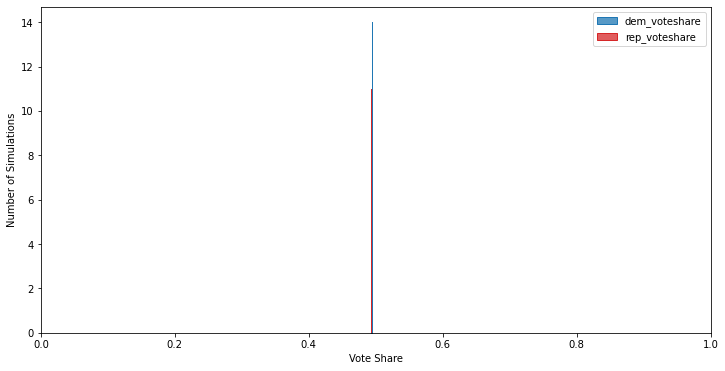

In [4]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(
    simulated_elections[["dem_voteshare", "rep_voteshare"]], element="step", bins=100, ax=ax, alpha=0.75
)
ax.set_xlabel("Vote Share")
ax.set_ylabel("Number of Simulations")
ax.set_xlim([0, 1])

Text(0, 0.5, 'Number of Simulations')

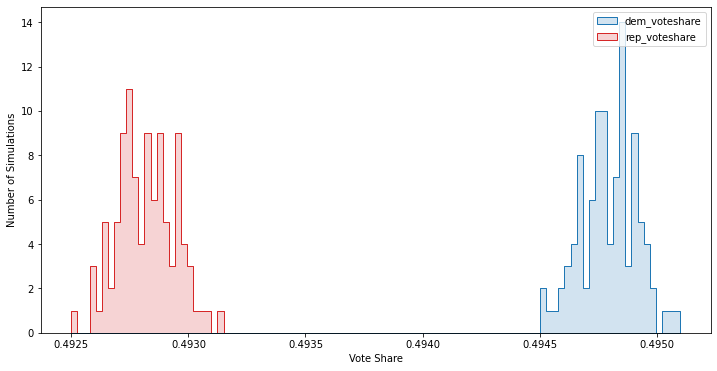

In [5]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(
    simulated_elections[["dem_voteshare", "rep_voteshare"]], element="step", bins=100, ax=ax, alpha=0.2
)
ax.set_xlabel("Vote Share")
ax.set_ylabel("Number of Simulations")

In [6]:
np.random.seed(1)
single_poll_results = run_polls(
    num_polls=1,
    num_to_poll=1000,
    electorate=electorate,
    assumed_demographics=demographics,
    sampling_strategy=predefined_sample(max_num_attempts=1, screen_likely_voters=False),
    aggregation_strategy=naive_aggregation()
).loc[0].to_dict()

single_poll_results

{'Dem': 0.496, 'Rep': 0.492, 'Other': 0.012}

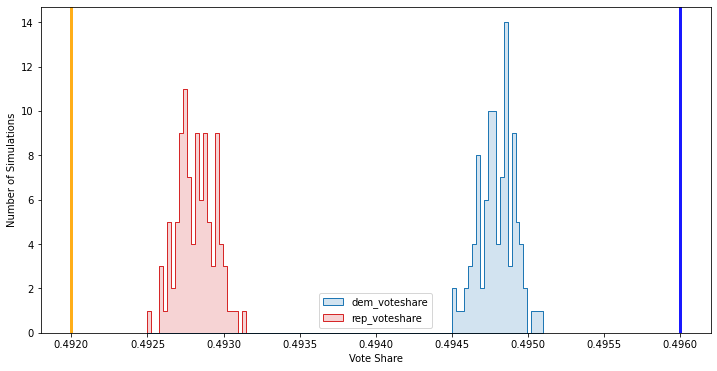

In [7]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(
    simulated_elections[["dem_voteshare", "rep_voteshare"]], element="step", bins=100, ax=ax, alpha=0.2
)
ax.set_xlabel("Vote Share")
ax.set_ylabel("Number of Simulations")
ax.axvline(single_poll_results["Rep"], color="red", lw=3, alpha=0.9)
ax.axvline(single_poll_results["Dem"], color="blue", lw=3, alpha=0.9)

In [8]:
# This cell may take ~10 minutes
poll_results = run_polls(
    num_polls=500,
    num_to_poll=1000,
    electorate=electorate,
    assumed_demographics=demographics,
    sampling_strategy=predefined_sample(max_num_attempts=1, screen_likely_voters=False),
    aggregation_strategy=naive_aggregation()
)

Text(0, 0.5, 'Number of Simulations')

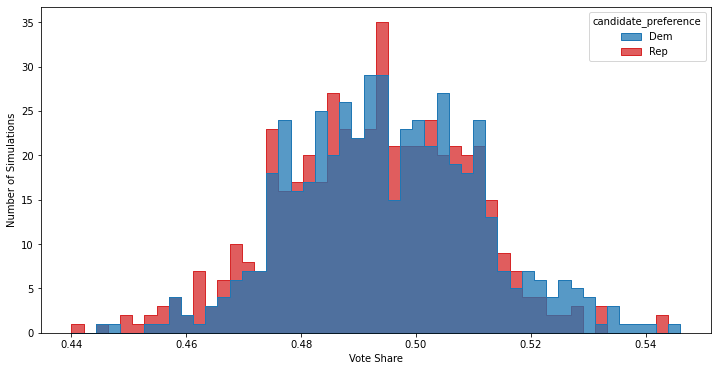

In [9]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(
    poll_results[["Dem", "Rep"]], element="step", bins=50, ax=ax, alpha=0.75
)
ax.set_xlabel("Vote Share")
ax.set_ylabel("Number of Simulations")